<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 9 </b></center>
<center><b><h5>K-means, K-Medoids</b></center>

<p>Name: Bhadra Mohitkumar Ajay</p>
<p>Enrollment: 23010101605</p>
<pre>    

# Step 1: Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 2: Load the Dataset
Load Given dataset -  StudentsPerformance.csv

In [67]:
data = pd.read_csv('StudentsPerformance.csv')

In [68]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [70]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [71]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Step 4: Display PairPlot

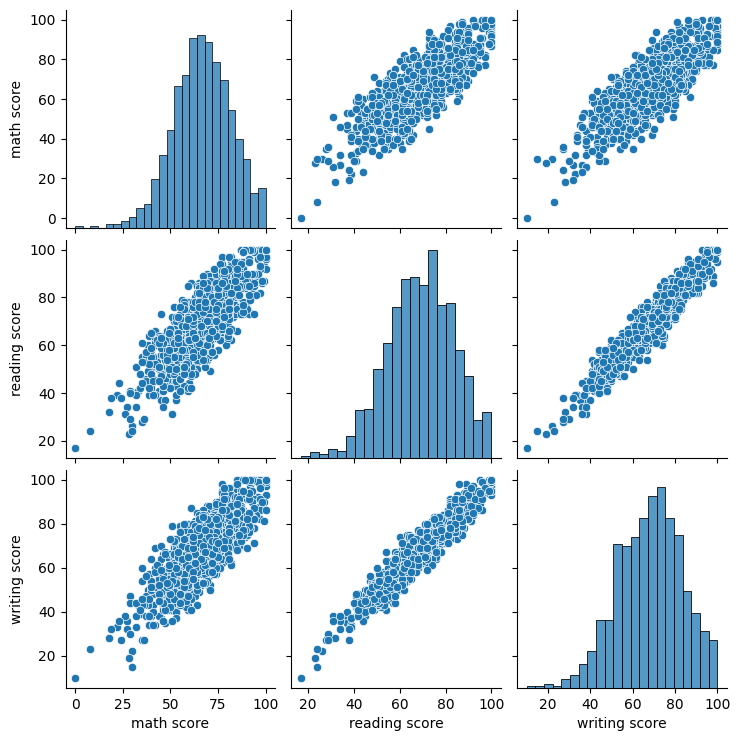

In [72]:
sns.pairplot(data)

# Step 5: Correlation heatmap

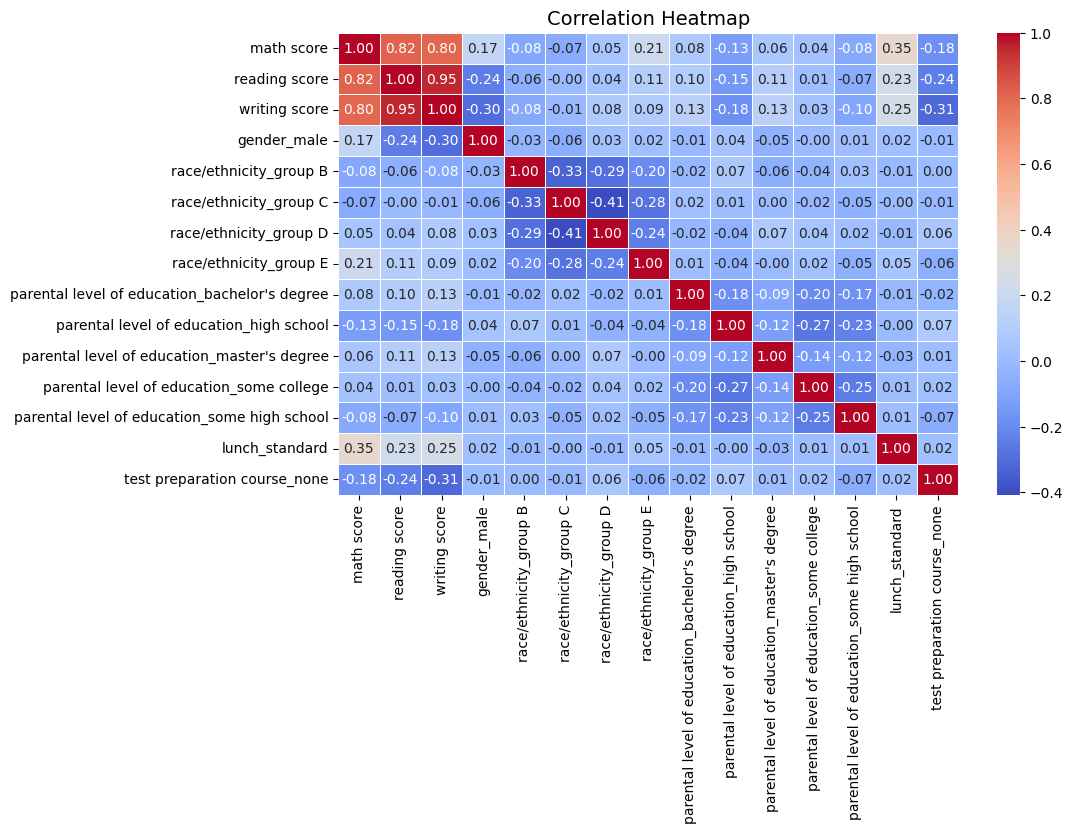

In [73]:
df_numeric = pd.get_dummies(data, drop_first=True)

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=14)

plt.show()

# Step 6: Distribution of numerical features

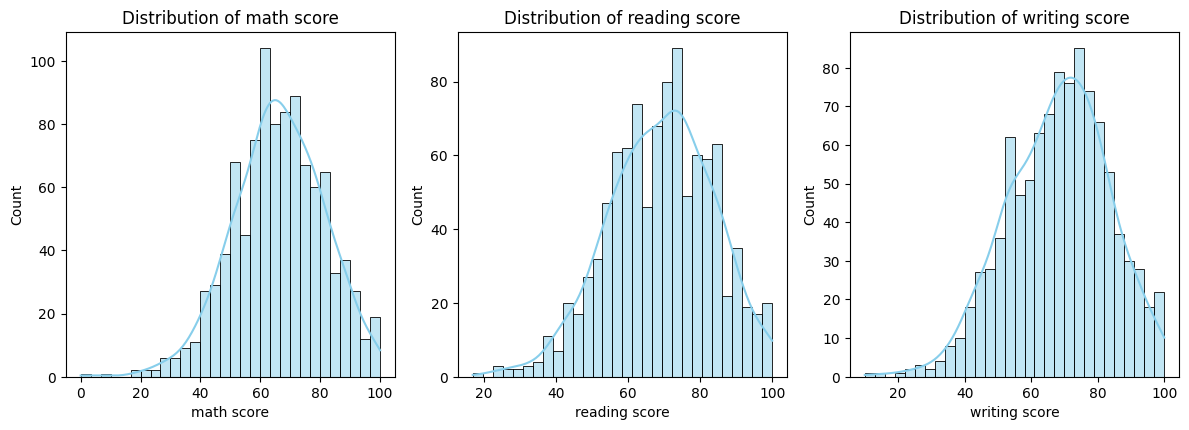

In [74]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  
    sns.histplot(data[col], bins=30, kde=True, color="skyblue")
    plt.title("Distribution of " + col)

plt.tight_layout()
plt.show()

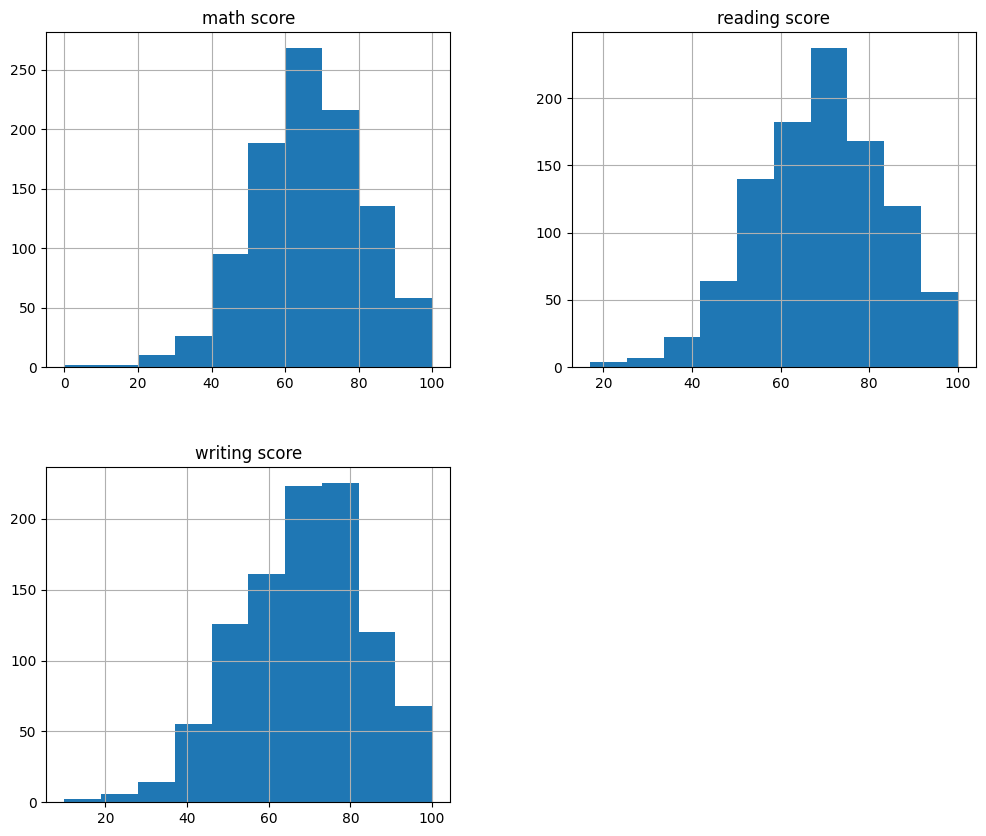

In [75]:
data.hist(figsize=(12,10))

plt.show()

# Step 7: Apply StandardScaler

In [76]:
scalar = StandardScaler()

scaled_data = scalar.fit_transform(data.select_dtypes(include=[np.number]))

In [77]:
print(scaled_data)

[[ 0.39002351  0.19399858  0.39149181]
 [ 0.19207553  1.42747598  1.31326868]
 [ 1.57771141  1.77010859  1.64247471]
 ...
 [-0.46775108  0.12547206 -0.20107904]
 [ 0.12609287  0.60515772  0.58901542]
 [ 0.71993682  1.15336989  1.18158627]]


# Step 8: Elbow method to find optimal k

In [78]:
data = pd.get_dummies(data, drop_first=True)

X=data.values


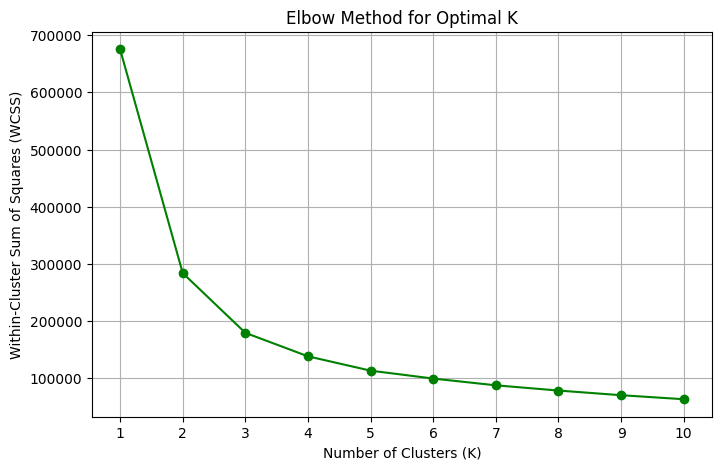

In [84]:
#Elbow method to find k
wcss = []
K_range = range(1, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# Step 9:Based on the elbow plot, choose an appropriate k value (e.g., k=3)

In [80]:
k = 10

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(X)

KMeans(n_clusters=10, random_state=42)

# Step 10: Print Cluster Center

In [81]:
cluster_center = kmeans.cluster_centers_

print("Cluster center: ", cluster_center)

Cluster center:  [[6.15217391e+01 7.10724638e+01 7.13913043e+01 1.88405797e-01
  1.88405797e-01 3.91304348e-01 2.68115942e-01 9.42028986e-02
  1.37681159e-01 1.81159420e-01 7.24637681e-02 2.02898551e-01
  1.44927536e-01 6.23188406e-01 6.01449275e-01]
 [8.29836066e+01 8.55245902e+01 8.45000000e+01 5.00000000e-01
  1.96721311e-01 2.54098361e-01 2.78688525e-01 2.21311475e-01
  1.47540984e-01 1.14754098e-01 9.83606557e-02 2.29508197e-01
  1.72131148e-01 7.78688525e-01 5.00000000e-01]
 [5.91276596e+01 5.34255319e+01 5.09787234e+01 9.57446809e-01
  2.12765957e-01 3.19148936e-01 2.34042553e-01 8.51063830e-02
  5.31914894e-02 3.40425532e-01 1.06382979e-02 2.12765957e-01
  1.80851064e-01 5.85106383e-01 8.08510638e-01]
 [3.11875000e+01 3.47500000e+01 3.24687500e+01 4.68750000e-01
  2.50000000e-01 3.12500000e-01 2.50000000e-01 9.37500000e-02
  9.37500000e-02 3.12500000e-01 6.93889390e-18 2.18750000e-01
  3.12500000e-01 2.50000000e-01 9.06250000e-01]
 [6.82635659e+01 6.42868217e+01 6.26899225e+01 

# Step 11: Plot Cluster

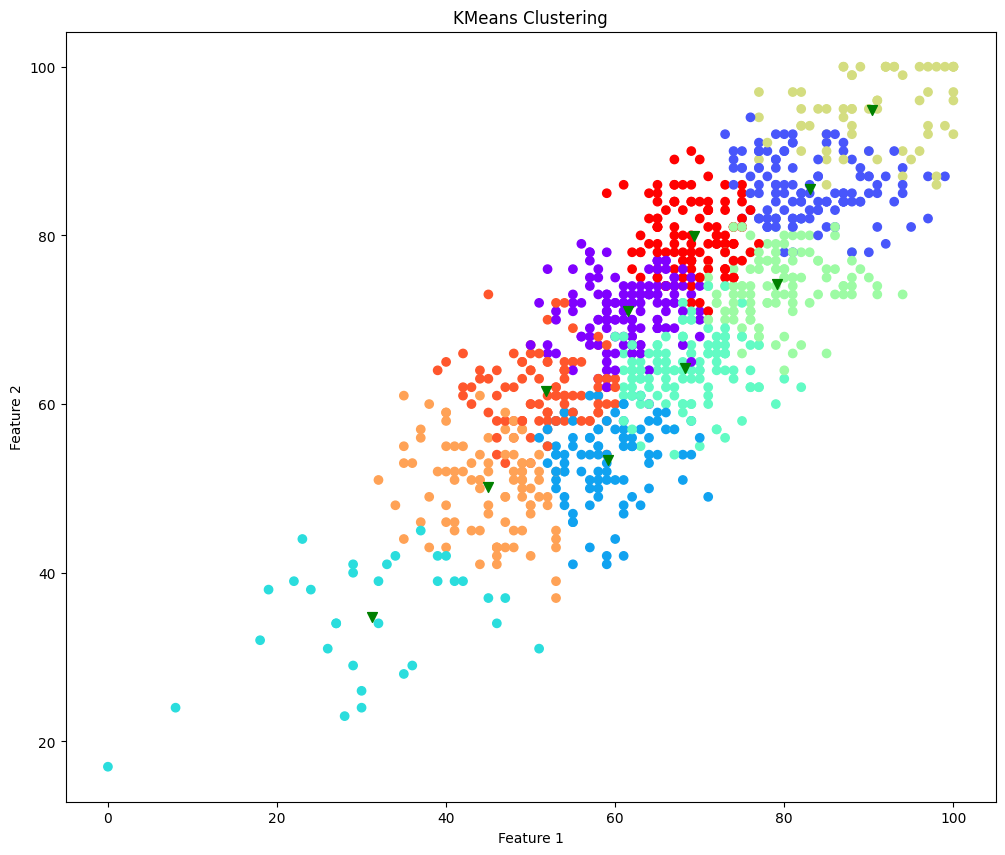

In [82]:
plt.figure(figsize=(12,10))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(cluster_center[:, 0], cluster_center[:, 1], marker='v', s=50, c='green')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Step 12:Analyze clusters 

In [ ]:
gdf = data.groupby("KMeans_Cluster")

In [ ]:
for index, data in gdf:
    print("Maximum:: " + data.max())
    print("Minimum:: " + data.min())
    print("Mean:: " + data.mean())

# Step 13: Perform K-Medoids

In [ ]:

kmedoids = KMedoids(n_clusters=3, random_state=42)
data['kmedoids_cluster'] = kmedoids.fit_predict(X)

In [ ]:
print(data[['math score', 'reading score', 'writing score', 'kmedoids_cluster']].head())

# Step:14 Comparison of K-means and K-medoids Clusters

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_score = silhouette_score(X, data['kmeans_cluster'])
print(f"K-Means Silhouette Score: {kmeans_score:.4f}")

kmedoids_score = silhouette_score(X, data['kmedoids_cluster'])
print(f"K-Medoids Silhouette Score: {kmedoids_score:.4f}")


# Step: 15 Implement K- Means with Library
# Sample data points
data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]

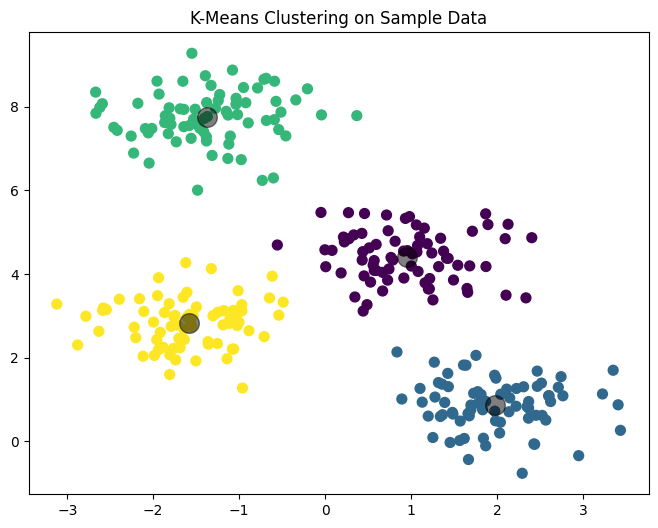

In [4]:
#Implement K-Means with Library sample data points
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

# Predict the cluster for each data point
kmeans.predict(X)

# Plot the data points and cluster centers
plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], s=50, c=kmeans.labels_, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.title('K-Means Clustering on Sample Data')

plt.show()
